In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
from math import *

### Read Data

In [6]:
dd = pd.read_csv('uo_nn_batch_590152-171251704.csv', sep=";")
dd.columns = dd.columns.str.replace(' ', '')

# convert Lk from string to np.array, separated by comma
dd['Lk'] = dd['Lk'].apply(lambda x: np.array(x.split(','), dtype=float))

dd.head()

,num_target,la,isd,niter,tex,tr_acc,te_acc,L*,||g*||,Lk
0,1,0.00,1,84,0.4618,100.0,99.6,5.810000e-07,9.470000e-07,"[0.25, 0.1437, 0.055989, 0.010159, 0.0068473, ..."
1,1,0.00,3,50,0.3009,100.0,99.6,1.380000e-35,1.030000e-34,"[0.25, 0.1437, 0.055619, 0.0077025, 0.0038855,..."
2,1,0.00,7,1625,0.0710,100.0,100.0,1.200000e-03,3.440000e-03,"[0.0012405, 0.0024928, 0.0011406, 0.0014767, 0..."
3,1,0.01,1,55,0.2818,99.6,100.0,2.760000e-02,5.720000e-07,"[0.25, 0.14435, 0.059258, 0.035652, 0.030432, ..."
4,1,0.01,3,47,0.3139,99.6,100.0,2.760000e-02,6.360000e-07,"[0.25, 0.14435, 0.058861, 0.033117, 0.028247, ..."


In [7]:
def show_heatmap(df, isd, val, figsize=(10,5), log:bool = False, vmin:float = None, vmax:float = None, fmt=".0e"):
        t = df[dd['isd'] == isd].pivot_table(index='la', columns='num_target', values=val)
        norm = matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax) if log else None
        plt.figure(figsize=figsize)
        sns.heatmap(t, annot=True, fmt=fmt, linewidths=.5, norm=norm, cmap='viridis')

def plot_val(df, isd, val, log:bool = False):
    t = df[dd['isd'] == isd]
    if log:
        t[val] = np.log(t[val])
    for i in range(10):
        plt.plot(t[t['num_target'] == i]['la'], t[t['num_target'] == i][val], label=i)

# Study of the convergence

## Global convergence

checking the gradient at the last iteration

||g*|| for isd = 1


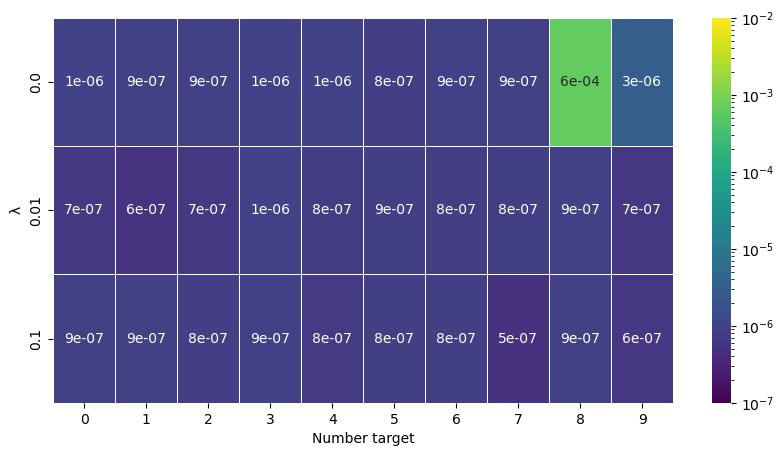

||g*|| for isd = 3


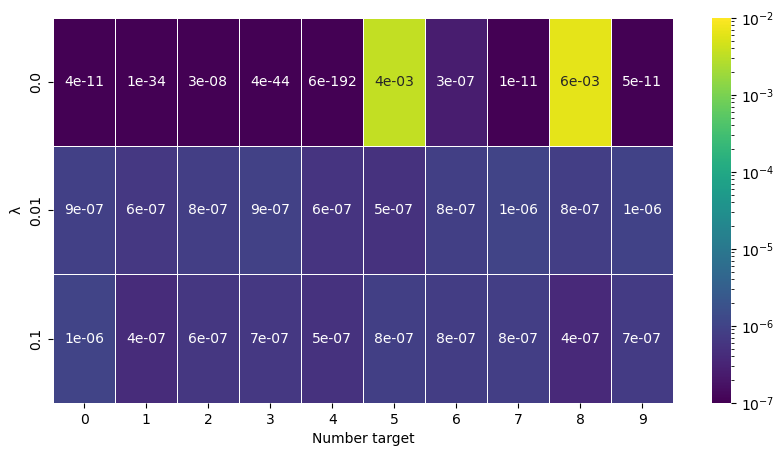

||g*|| for isd = 7


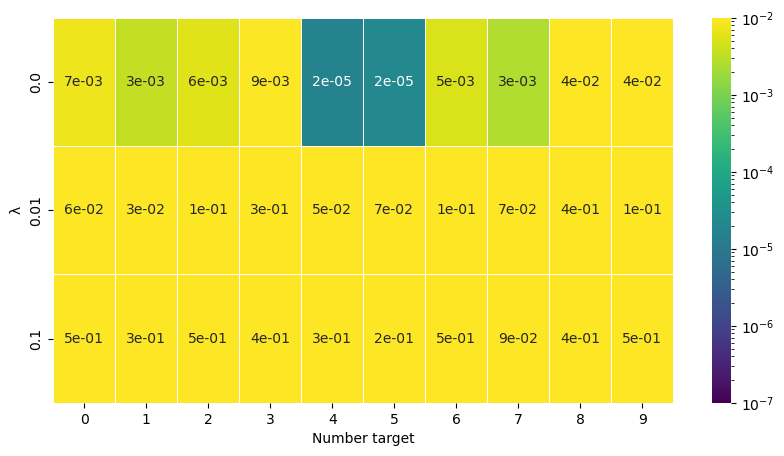

In [8]:
par = '||g*||'
for isd in [1, 3, 7]:
    show_heatmap(dd, isd, par, log=True, vmin=1e-7, vmax=1e-2)
    plt.xlabel('Number target')
    plt.ylabel('λ')
    print(f'{par} for isd = ' + str(isd))
    plt.savefig(f'figures/go_isd_{isd}.png', dpi=300, bbox_inches='tight')
    plt.show()

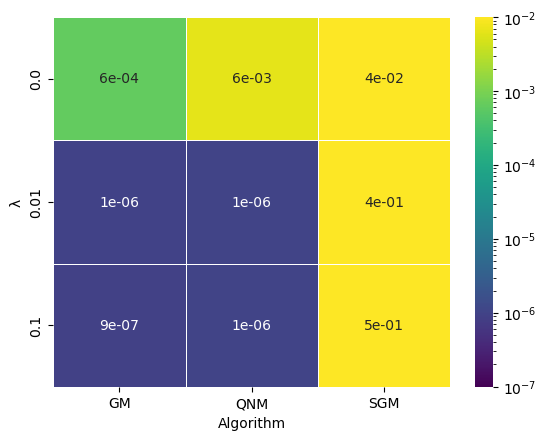

In [9]:
def worst_go(df):
    df = df[['isd', 'la', '||g*||']]
    df = df.sort_values(by=['||g*||'], ascending=False)
    df = df.drop_duplicates(subset=['isd', 'la'])
    return df

wg = worst_go(dd)
isd_names = {1: 'GM', 3: 'QNM', 7: 'SGM'}
wg['isd'] = wg['isd'].apply(lambda x: isd_names[x])
sns.heatmap(wg.pivot_table(index='la', columns='isd', values='||g*||'),annot=True, fmt=".0e", linewidths=.5, norm=matplotlib.colors.LogNorm(vmin=1e-7, vmax=1e-2), cmap='viridis')
plt.xlabel('Algorithm')
plt.ylabel('λ')
plt.savefig('figures/worst_go.png', dpi=300, bbox_inches='tight')
plt.show()

L* for isd = 1


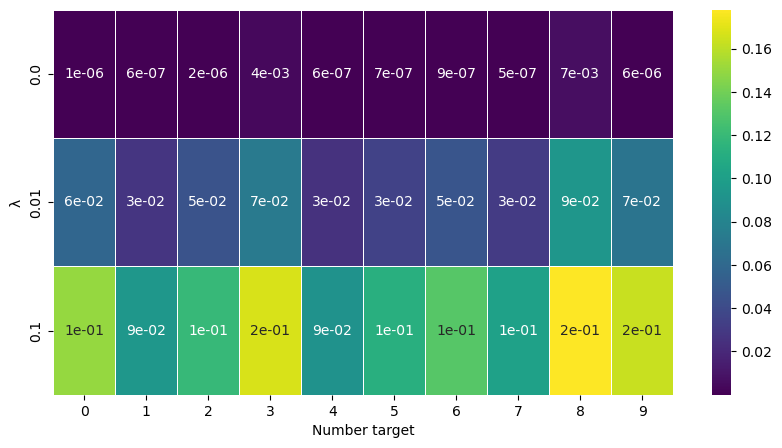

L* for isd = 3


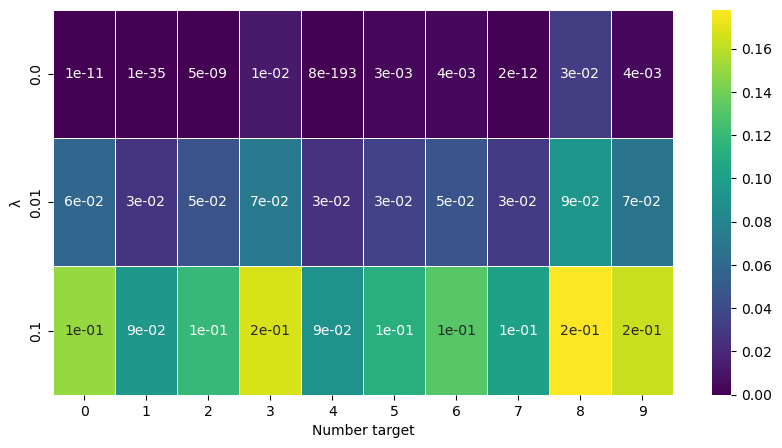

L* for isd = 7


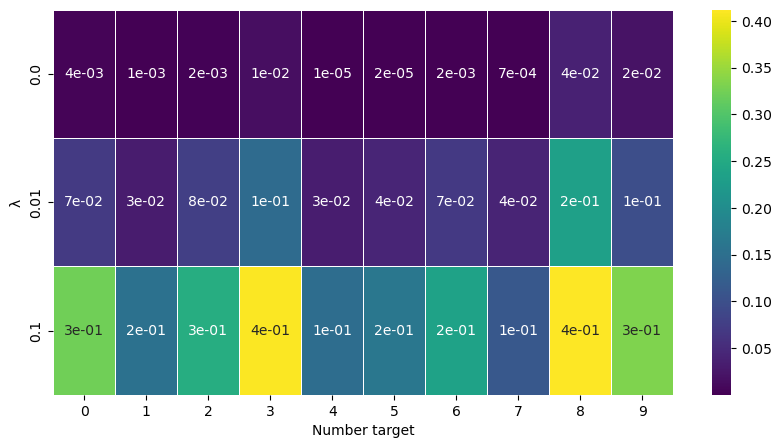

In [19]:
# heat map x axis: number of target, y axis: lambda, color: value of L*
def show_heatmap_L(df, isd, val, figsize=(10,5), log:bool = False, vmin:float = None, vmax:float = None, fmt=".0e"):
        t = df[dd['isd'] == isd].pivot_table(index='la', columns='num_target', values=val)
        norm = matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax) if log else None
        plt.figure(figsize=figsize)
        sns.heatmap(t, annot=True, fmt=fmt, linewidths=.5, norm=norm, cmap='viridis')
        
def plot_val_L(df, isd, val, log:bool = False):
    t = df[dd['isd'] == isd]
    if log:
        t[val] = np.log(t[val])
    for i in range(10):
        plt.plot(t[t['num_target'] == i]['la'], t[t['num_target'] == i][val], label=i)
        
par = 'L*'

for isd in [1, 3, 7]:
    show_heatmap_L(dd, isd, par, log=False, vmin=1e-7, vmax=1e-2)
    plt.xlabel('Number target')
    plt.ylabel('λ')
    print(f'{par} for isd = ' + str(isd))
    plt.savefig(f'figures/L_isd_{isd}.png', dpi=300, bbox_inches='tight')
    plt.show()


Check the evolution of L* for each model trained

In [11]:
# for num_target in range(10):
#     fig, axs = plt.subplots(len(dd['isd'].unique()), len(dd['la'].unique()), figsize=(15, 15))
#     for i, isd in enumerate(dd['isd'].unique()):
#         for j, la in enumerate(dd['la'].unique()):
#             t = dd[(dd['isd'] == isd) & (dd['la'] == la) & (dd['num_target'] == num_target)]
#             axs[i, j].plot(t['Lk'].values[0], label='L*')
#             axs[i, j].set_title(f'isd = {isd}, la = {la}')
#             axs[i, j].legend()
    
#     plt.suptitle(f'num_target = {num_target}')
#     plt.show()

## Local convergence

niter for isd = 1


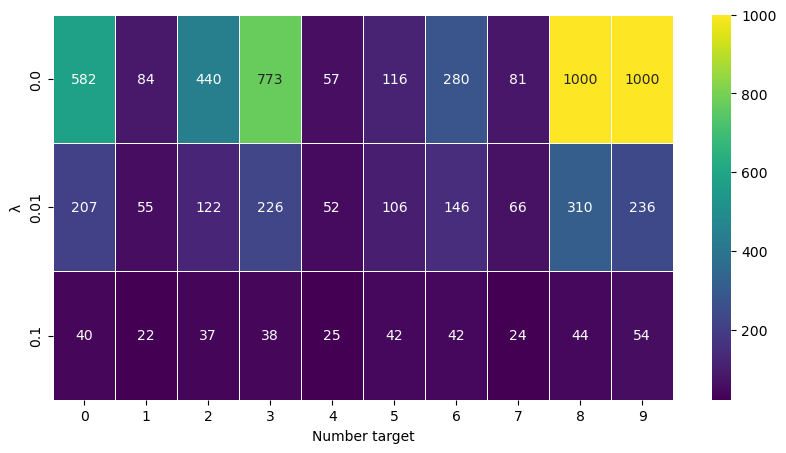

niter for isd = 3


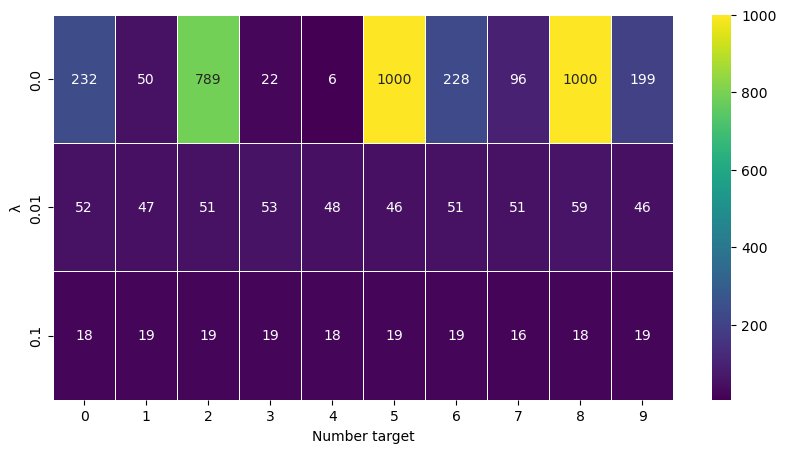

niter for isd = 7


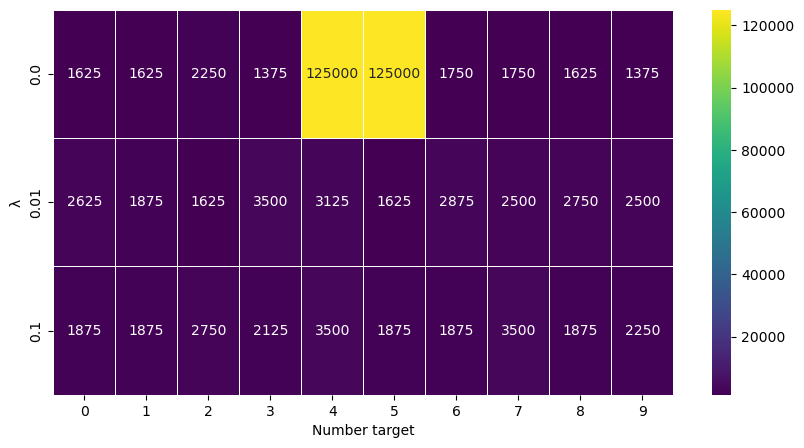

In [12]:
par = 'niter'
for isd in [1, 3, 7]:
    show_heatmap(dd, isd, par, fmt=".0f")
    plt.xlabel('Number target')
    plt.ylabel('λ')
    print(f'{par} for isd = ' + str(isd))
    plt.savefig(f'figures/niter_isd_{isd}.png', dpi=300, bbox_inches='tight')
    plt.show()

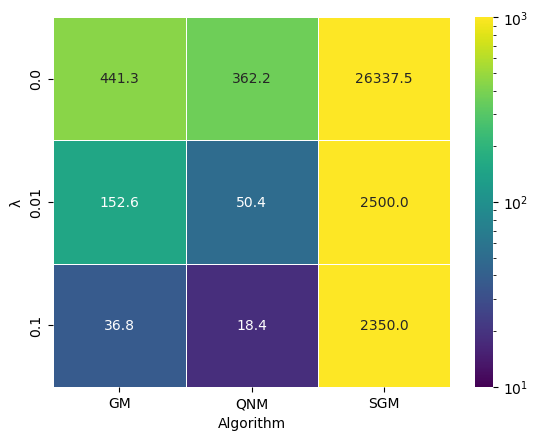

In [13]:
# generate a new dataset with the average number of iterations for each isd and la
def avg_niter(df):
    df = df[['isd', 'la', 'niter']]
    df = df.groupby(['isd', 'la']).mean()
    df = df.reset_index()
    return df

an = avg_niter(dd)
an['isd'] = an['isd'].apply(lambda x: isd_names[x])
norm = matplotlib.colors.LogNorm(vmin=1e1, vmax=1e3)
sns.heatmap(an.pivot_table(index='la', columns='isd', values='niter'),annot=True, fmt=".1f", linewidths=.5, cmap='viridis', norm=norm)
plt.xlabel('Algorithm')
plt.ylabel('λ')
plt.savefig('figures/avg_niter.png', dpi=300, bbox_inches='tight')
plt.show()

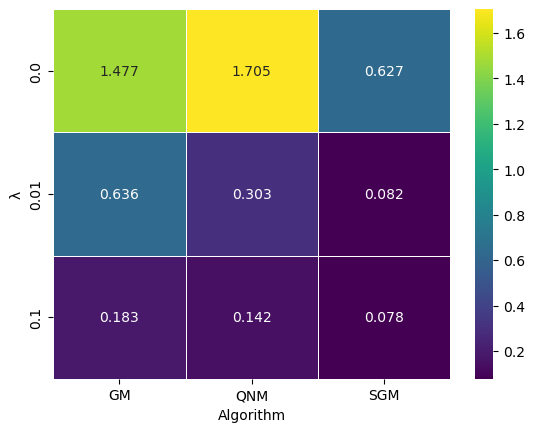

In [14]:
# generate a new dataset with the average tex for each isd and la
def avg_tex(df):
    df = df[['isd', 'la', 'tex']]
    df = df.groupby(['isd', 'la']).mean()
    df = df.reset_index()
    return df

at = avg_tex(dd)
at['isd'] = at['isd'].apply(lambda x: isd_names[x])
norm = None
sns.heatmap(at.pivot_table(index='la', columns='isd', values='tex'),annot=True, fmt=".3f", linewidths=.5, cmap='viridis', norm=norm)
plt.xlabel('Algorithm')
plt.ylabel('λ')
plt.savefig('figures/avg_tex.png', dpi=300, bbox_inches='tight')
plt.show()

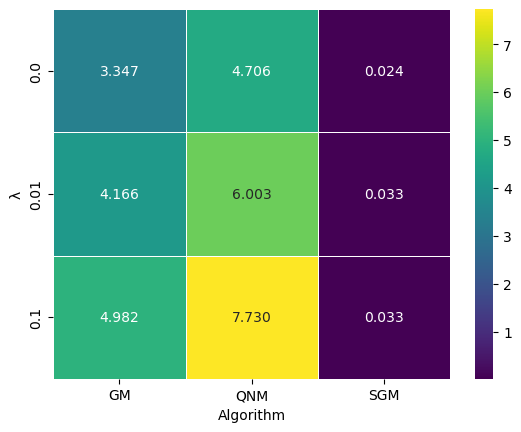

In [15]:
# plot avg tex/ avg niter
at['niter'] = an['niter']
at['tex/niter'] = (at['tex'] / at['niter'])*1000 # we keep the time in ms

sns.heatmap(at.pivot_table(index='la', columns='isd', values='tex/niter'),annot=True, fmt=".3f", linewidths=.5, cmap='viridis', norm=norm)
plt.xlabel('Algorithm')
plt.ylabel('λ')
plt.savefig('figures/avg_tex_niter.png', dpi=300, bbox_inches='tight')
plt.show()

# Study of the recognition accuracy

te_acc for isd = 1


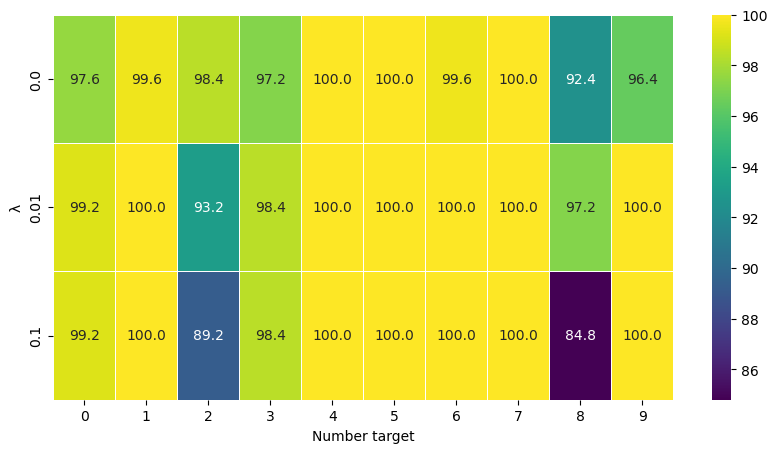

te_acc for isd = 3


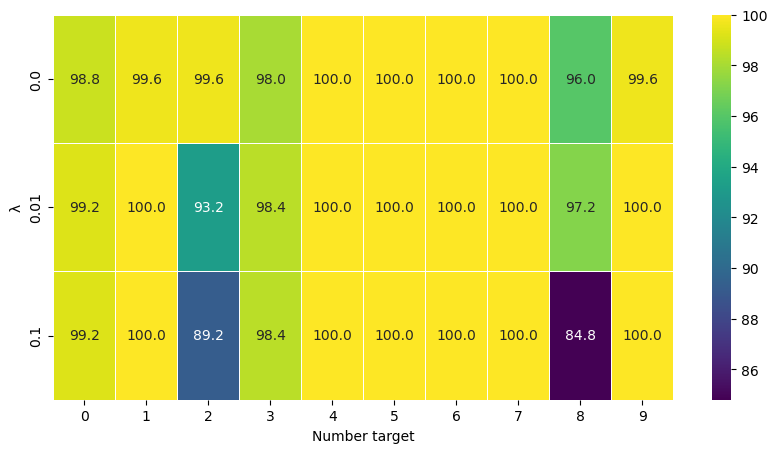

te_acc for isd = 7


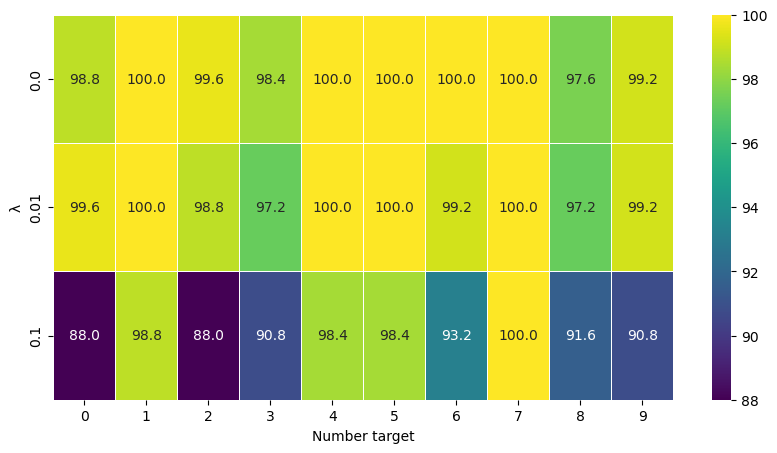

In [16]:
# show heatmap of the acuracy
par = 'te_acc'
for isd in [1, 3, 7]:
    show_heatmap(dd, isd, par, fmt=".1f")
    plt.xlabel('Number target')
    plt.ylabel('λ')
    print(f'{par} for isd = ' + str(isd))
    plt.savefig(f'figures/accuracy_isd_{isd}.png', dpi=300, bbox_inches='tight')
    plt.show()

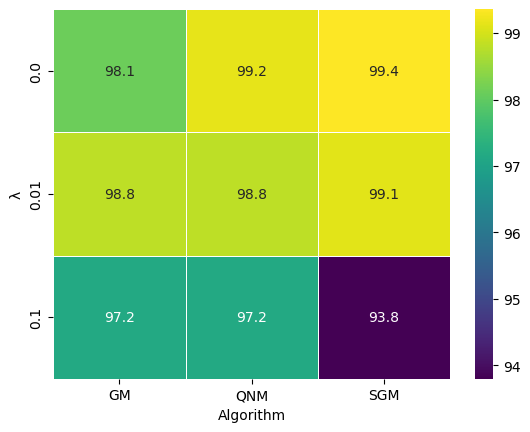

In [17]:
# average accuracy for each isd and la
def avg_acc(df):
    df = df[['isd', 'la', 'te_acc']]
    df = df.groupby(['isd', 'la']).mean()
    df = df.reset_index()
    return df

aa = avg_acc(dd)
aa['isd'] = aa['isd'].apply(lambda x: isd_names[x])
norm = None
sns.heatmap(aa.pivot_table(index='la', columns='isd', values='te_acc'),annot=True, fmt=".1f", linewidths=.5, cmap='viridis', norm=norm)
plt.xlabel('Algorithm')
plt.ylabel('λ')
plt.savefig('figures/avg_acc.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\Carlos Arbonés\AppData\Local\Temp\ipykernel_9232\2231124761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isd'] = df['isd'].apply(lambda x: isd_names[x])


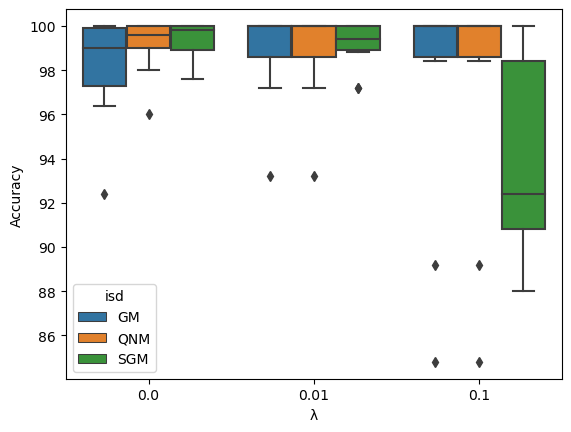

In [18]:
# boxplot of the accuracy for each isd and la

def boxplot_acc(df):
    df = df[['isd', 'la', 'te_acc']]
    df['isd'] = df['isd'].apply(lambda x: isd_names[x])
    return df

ba = boxplot_acc(dd)
sns.boxplot(x='la', y='te_acc', hue='isd', data=ba)
plt.xlabel('λ')
plt.ylabel('Accuracy')
#plt.savefig('figures/boxplot_acc.png', dpi=300, bbox_inches='tight')
plt.show()